## To make contour plots as monthly climatology and the difference between rean and gpsro, inspo Kim and Son

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import datetime
import cartopy as ccrs

In [2]:
path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/'

era5_zonmean = xr.open_dataset(path + 'FULL-ERA5.tp.monzonmean.2000-2018.nc4')
erai_zonmean = xr.open_dataset(path + 'erai.tp.ctp.monmean.zm.nc')
gpsro = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

ds = xr.open_dataset('gridfile_test.nc')
ds2 = xr.open_dataset('erai_regrid_5x5.nc')

In [3]:
era5_trop = era5_zonmean.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
era5_mon = era5_trop.groupby('time.month').mean(dim='time')

erai_trop = erai_zonmean.sel(lat=slice(20,-20), time=slice('2007-01-01', '2018-12-31'))
erai_mon = erai_trop.groupby('time.month').mean(dim='time')

In [8]:
erai_grid = ds2.sel(lat=slice(-20,20),time=slice('2007-01-01', '2018-12-31'))
erai_grid_mon = erai_grid.groupby('time.month').mean(dim='time')
erai_zon = erai_grid_mon.mean(axis=2)
erai_zon['month'] = erai_grid_mon.month
erai_zon['lat'] = erai_grid_mon.lat
erai_mean = erai_zon.mean(axis=1)
erai_mean['month'] = erai_zon.month

era5_grid = ds.sel(lat=slice(-20,20))
era5_grid_mon = era5_grid.groupby('time.month').mean(dim='time')
era5_zon = era5_grid_mon.mean(axis=2)
era5_zon['month'] = era5_grid_mon.month
era5_zon['lat'] = era5_grid_mon.lat
era5_mean = era5_zon.mean(axis=1)
era5_mean['month'] = era5_zon.month

gpsro_trop = gpsro.sel(lat=slice(-20,20))
gpsro_mm = gpsro_trop.resample(time='M').mean()
gpsro_mon = gpsro_mm.groupby('time.month').mean(dim='time')
gpsro_zon = gpsro_mon.mean(axis=(2))

gpsro_zon['month'] = gpsro_mon.month
gpsro_zon['lat'] = gpsro_mon.lat

gpsro_mean = gpsro_zon.mean(axis=1)
gpsro_mean['month'] = gpsro_zon.month

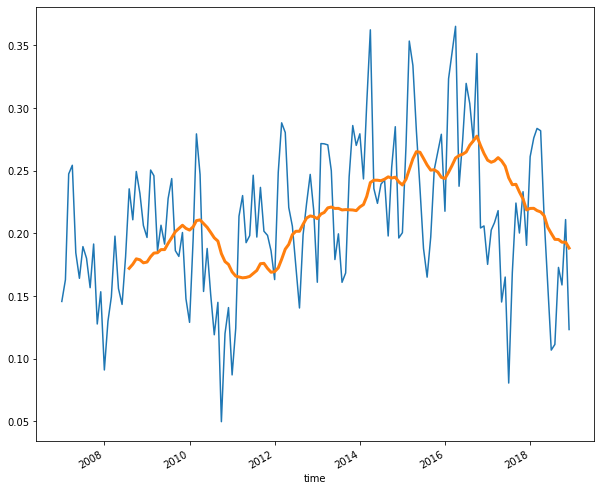

In [26]:
plt.figure(figsize=(10,8))
era5_tm = era5_grid.ctpt.mean(axis=(1,2))
gpsro_tm = gpsro_mm.CP_T.mean(axis=(1,2))
diff = era5_tm - gpsro_tm.values
diff.plot()
diff.rolling(time=20).mean().plot(linewidth=3)
#plt.xlim('2007','2009')

(732677.0, 734138.0)

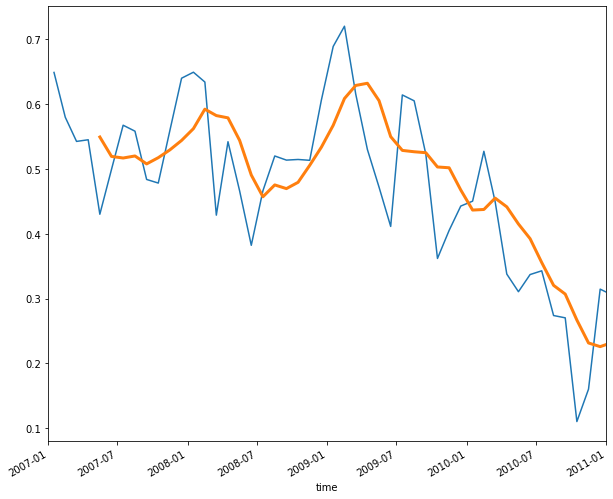

In [32]:
plt.figure(figsize=(10,8))
era5_tm = era5_grid.ctpt.mean(axis=(1,2))
erai_tm = erai_grid.ctpt.mean(axis=(1,2))
gpsro_tm = gpsro_mm.CP_T.mean(axis=(1,2))
diff = era5_tm - gpsro_tm.values
diff2 = erai_tm - gpsro_tm.values
diff2.plot()
diff2.rolling(time=5).mean().plot(linewidth=3)
plt.xlim('2007','2011')

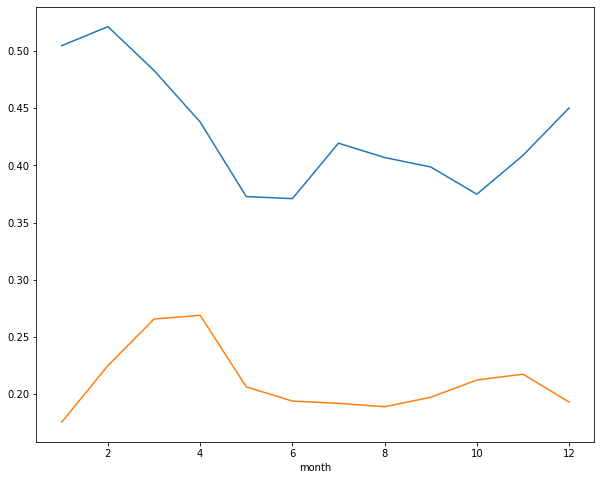

In [17]:
plt.figure(figsize=(10,8))
dd1 = era5_mean.ctpt - gpsro_mean.CP_T
dd2 = erai_mean.ctpt - gpsro_mean.CP_T
dd2.plot()
dd1.plot()

In [75]:
d1 = era5_zon.ctpt - gpsro_zon.CP_T.values
d2 = erai_zon.ctpt - gpsro_zon.CP_T.values

d3 = era5_zon.tpt - gpsro_zon.LR_T.values
d4 = erai_zon.tpt - gpsro_zon.LR_T.values

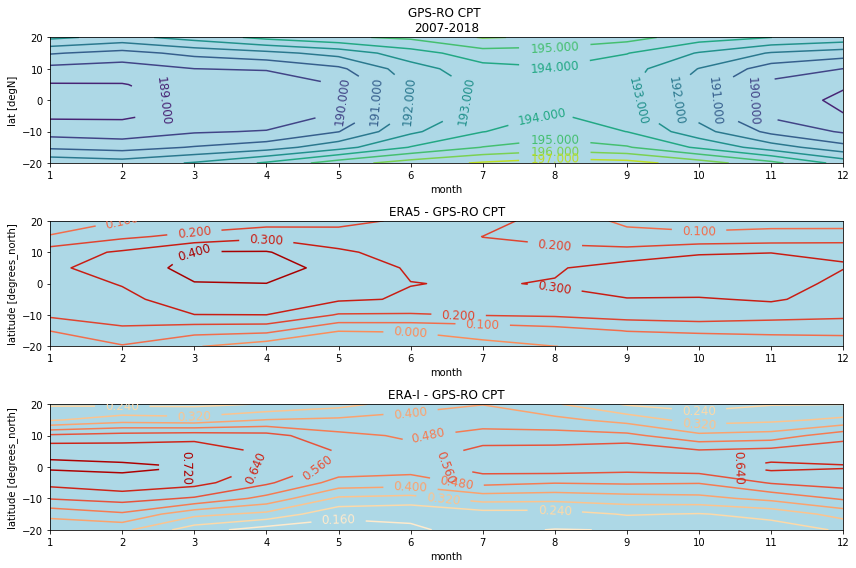

In [79]:
mon=np.linspace(1,12,12)
f, axs = plt.subplots(3,1,figsize=(12,8))


con_0 = gpsro_zon.CP_T.plot.contour(ax=axs[0], x='month', y = 'lat', levels=10)
axs[0].clabel(con_0, fontsize=12)
axs[0].set_title('GPS-RO CPT \n2007-2018', fontsize=12)

con = d1.plot.contour(ax=axs[1], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[1].clabel(con, fontsize=12)
axs[1].set_title('ERA5 - GPS-RO CPT', fontsize=12)

con2 = d2.plot.contour(ax=axs[2], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[2].clabel(con2, fontsize=12)
axs[2].set_title('ERA-I - GPS-RO CPT', fontsize=12)

for ax in axs:
    
    ax.set_xticks(mon)
    
    ax.set_facecolor('lightblue')
    
plt.tight_layout()

#plt.savefig('zonmean_contour_CPT_monthlyclim_2007-2018.pdf')

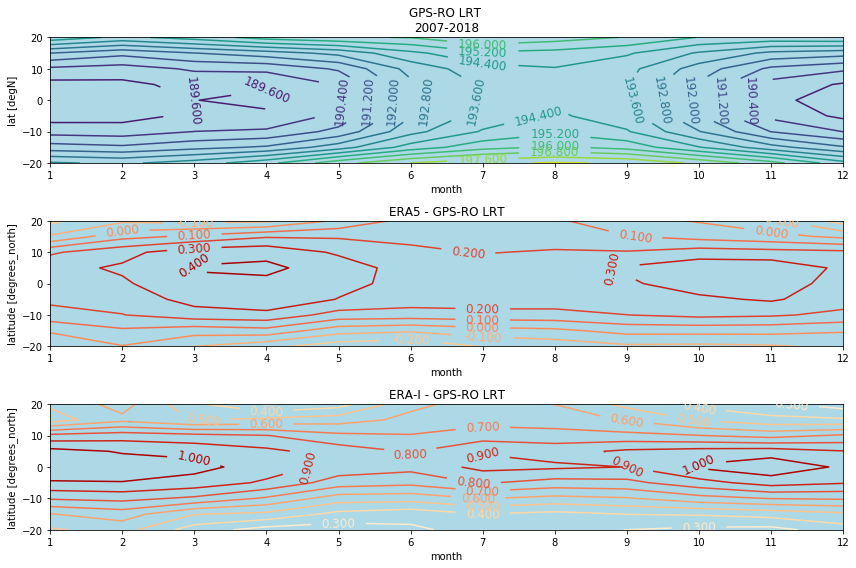

In [80]:
mon=np.linspace(1,12,12)
f, axs = plt.subplots(3,1,figsize=(12,8))


con_0 = gpsro_zon.LR_T.plot.contour(ax=axs[0], x='month', y = 'lat', levels=15)
axs[0].clabel(con_0, fontsize=12)
axs[0].set_title('GPS-RO LRT \n2007-2018', fontsize=12)

con = d3.plot.contour(ax=axs[1], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[1].clabel(con, fontsize=12)
axs[1].set_title('ERA5 - GPS-RO LRT', fontsize=12)

con2 = d4.plot.contour(ax=axs[2], x='month', y='lat', levels=10, cmap = 'OrRd')
axs[2].clabel(con2, fontsize=12)
axs[2].set_title('ERA-I - GPS-RO LRT', fontsize=12)

for ax in axs:
    
    ax.set_xticks(mon)
    
    ax.set_facecolor('lightblue')
    
plt.tight_layout()

#plt.savefig('zonmean_contour_LRT_monthlyclim_2007-2018.pdf')